## Random Forest
Decision tree - widely used method bc easy to understand / black box model
black box - hard to understand why this model is making certain results

find the boundary line - separate 2 cases
noise - only in training set

training the model..
decision tree - keep addding the nodes, classify perfectly

fit model to noise -> we do not want to have

Pruning (limit the num of question/nodes in the decision tree)

- Overfitting : noise

to avoid overfitting
- Random Forest / multiple decision tree
training sample - data sets with replacement from the training data

* Each tree is using a subset of features

## Random Forest

### 0.Data

In [11]:
import pandas as pd

In [22]:
house = pd.read_excel("http://byungwan.com/class/House_Prices.xls")
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [23]:
house = pd.get_dummies(house, columns=["Brick","Neighborhood"], drop_first = True, dtype = int)
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


In [24]:
house["House_Class"] = pd.qcut(house["Price"], 2, labels=[0,1])
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,House_Class
0,1,114300,1790,2,2,2,0,0,0,0
1,2,114200,2030,4,2,3,0,0,0,0
2,3,114800,1740,3,2,1,0,0,0,0
3,4,94700,1980,3,2,3,0,0,0,0
4,5,119800,2130,3,3,3,0,0,0,0


In [25]:
house.columns.get_loc("House_Class")

9

In [26]:
y = house.iloc[:, 9]

In [27]:
x = house.iloc[:, 2:9]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

### 1. Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=5, random_state=0)

In [37]:
rfc_model = rfc.fit(x_train, y_train)

In [39]:
y_pred = rfc_model.predict(x_test)

In [40]:
from sklearn import metrics

In [42]:
metrics.accuracy_score(y_test, y_pred)

0.8461538461538461

#### 1.1 Visualization

In [44]:
tree0 = rfc_model.estimators_[0]

In [45]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

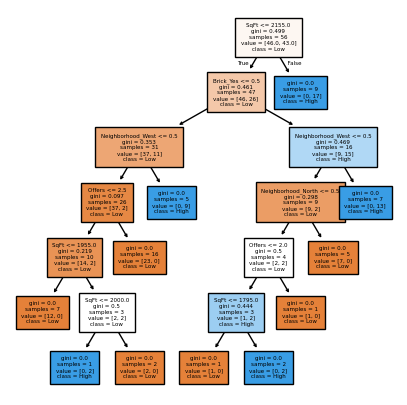

In [52]:
plt.figure(figsize=(5,5))
plot_tree(tree0, feature_names = x.columns.tolist(), fontsize=4, class_names=["Low","High"],filled=True)
plt.show()

In [53]:
tree1 = rfc_model.estimators_[1]

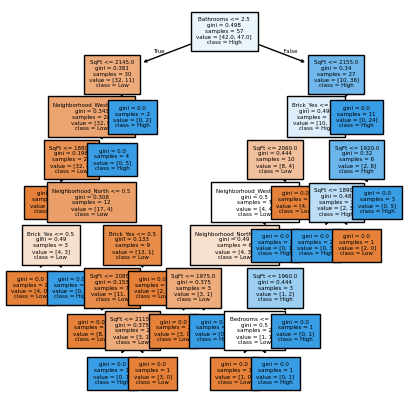

In [54]:
plt.figure(figsize=(5,5))
plot_tree(tree1, feature_names = x.columns.tolist(), fontsize=4, class_names=["Low","High"],filled=True)
plt.show()

#### 1.2. # of trees

In [58]:
rfc = RandomForestClassifier(n_estimators = 5, random_state=0, oob_score = True)

In [59]:
rfc_model = rfc.fit(x_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [60]:
rfc_model.oob_score_

0.7528089887640449

In [61]:
nums = list(range(1,21))
nums

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [64]:
errors = []

for n in nums:
    rfc_n = RandomForestClassifier(n_estimators = n, random_state=0, oob_score = True)
    rfc_model_n = rfc_n.fit(x_train, y_train)
    error = 1 - rfc_model_n.oob_score_
    errors.append(error)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This p

In [65]:
errors

[0.3258426966292135,
 0.2921348314606742,
 0.2921348314606742,
 0.2696629213483146,
 0.2471910112359551,
 0.1910112359550562,
 0.1797752808988764,
 0.1910112359550562,
 0.1685393258426966,
 0.1460674157303371,
 0.1460674157303371,
 0.1460674157303371,
 0.1460674157303371,
 0.1348314606741573,
 0.1460674157303371,
 0.1348314606741573,
 0.1460674157303371,
 0.1460674157303371,
 0.1235955056179775,
 0.1235955056179775]

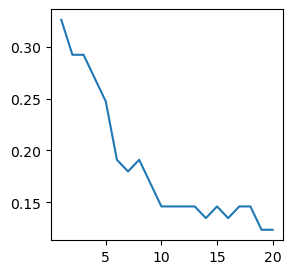

In [69]:
plt.figure(figsize=(3,3))
plt.plot(nums, errors)
plt.show()